# CH6 SVM

* PRML
* Learning with Kernels

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

### readlines

In [2]:
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split("\t")
        dataMat.append([float(lineArr[0]),float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat
    

### pandas

In [3]:
import pandas as pd
def loadDataSet(fileName):
    df = pd.read_table(fileName, header=None)
    dataMat = df[[0,1]].values
    labelMat = df[2].values
    return dataMat, labelMat

In [4]:
dataArr, labelArr = loadDataSet("./Data/CH6/testSet.txt")

### helper function

In [5]:
def selectJrand(i,m):
    j=i
    while (j==i):
        j = int(np.random.uniform(0,m))
    return j

def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

## SMO

### smoSimple

In [6]:
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = np.mat(dataMatIn)             # mxn = 100x2
    labelMat = np.mat(classLabels).transpose() # mx1 = 100x1
    b = 0; m,n = np.shape(dataMatrix)          # mxn
    alphas = np.mat(np.zeros((m,1)))           # mx1 
    iter_ = 0
    while (iter_ < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            # f(x) at i 
            #1
            fXi = float(np.multiply(alphas,labelMat).T* \
                       (dataMatrix*dataMatrix[i,:].T)) + b #2
                        # [1]
                        # a * y * x * xi + b 
                        # multiply(mx1,mx1).T = multipy(100x1,100x1).T = (100x1).T = (1x100)
                        #[2]
                        # (mxn)x(1xn).T = (100x2)x(1x2).T = (100x2)x(2x1) = (100x1)
                        # 1
            Ei = fXi - float(labelMat[i])
            
            if ((labelMat[i]*Ei < - toler) and (alphas[i] < C)) or \
                ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                    # f(x) at j
                    j = selectJrand(i,m)
                    fXj = float(np.multiply(alphas,labelMat).T*\
                                (dataMatrix*dataMatrix[j,:].T)) + b
                    Ej = fXj - float(labelMat[j])
                    alphaIold = alphas[i].copy()
                    alphaJold = alphas[j].copy()
                    
                    if (labelMat[i] != labelMat[j]):
                        L = max(0, alphas[j] - alphas[i])
                        H = min(C, C + alphas[j] - alphas[i])
                    else:
                        L = max(0, alphas[j] + alphas[i] - C)
                        H = min(C, alphas[j] + alphas[i])
                    if L==H: 
                        print("L==H")
                        continue
                    # 1x2 x (1x2).T = 1x2x2x1
                    # alpha 最优修改量 = xj^2 - xi^2 - 2xixj = (xj - xi)^2 - 2xi^2
                    eta = 2*dataMatrix[i,:]*dataMatrix[j,:].T-\
                        dataMatrix[i,:]*dataMatrix[i,:].T-\
                        dataMatrix[j,:]*dataMatrix[j,:].T

                    if eta >= 0:
                        print("eta>=0")
                        continue
                    alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                    alphas[j] = clipAlpha(alphas[j],H,L)
                    if (abs(alphas[j] - alphaJold) < 0.00001):
                        print("j not moving enough")
                        continue
                    alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                    b1 = b - Ei - labelMat[i]*(alphas[i] - alphaIold)*\
                        dataMatrix[i,:]*dataMatrix[i,:].T - \
                        labelMat[j]*(alphas[j]-alphaJold)*\
                        dataMatrix[i,:]*dataMatrix[j,:].T
                    b2 = b - Ej - labelMat[i]*(alphas[i]-alphaIold)*\
                        dataMatrix[i,:]*dataMatrix[j,:].T -\
                        labelMat[j]*(alphas[j]-alphaJold)*\
                        dataMatrix[j,:]*dataMatrix[j,:].T
                    if (0 < alphas[i]) and (C > alphas[j]):
                        b = b1
                    elif (0 < alphas[j]) and (C > alphas[j]):
                        b = b2
                    else:
                        b = (b1 + b2)/2
                    alphaPairsChanged += 1
                    print("iter: %d i: %d, paris changed %d" % (iter_, i, alphaPairsChanged))
        if (alphaPairsChanged == 0):
            iter_ += 1
        else:
            iter_ = 0
        print("iteration number: %d" % iter_)
    return b, alphas

In [7]:
b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)

L==H
iter: 0 i: 1, paris changed 1
iter: 0 i: 2, paris changed 2
iter: 0 i: 4, paris changed 3
iter: 0 i: 7, paris changed 4
iter: 0 i: 8, paris changed 5
L==H
iter: 0 i: 17, paris changed 6
L==H
iter: 0 i: 21, paris changed 7
iter: 0 i: 22, paris changed 8
iter: 0 i: 23, paris changed 9
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
L==H
L==H
L==H
iter: 0 i: 56, paris changed 10
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
L==H
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i: 17, paris changed 1
j not moving enough
j not moving enough
j not moving enough
iter: 0 i: 34, paris changed 2
iter: 0 i: 37, paris changed 3
iter: 0 i: 48, paris changed 4
iter: 0 i: 54, paris changed 5
L==H
j not mov

j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1

j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
iter: 7 i: 54, paris changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not mov

j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 13
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 14
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 15
iter: 15 i: 17, paris changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j 

j not moving enough
j not moving enough
iteration number: 19
j not moving enough
j not moving enough
j not moving enough
iteration number: 20
j not moving enough
j not moving enough
j not moving enough
iteration number: 21
j not moving enough
j not moving enough
j not moving enough
iteration number: 22
j not moving enough
j not moving enough
j not moving enough
iteration number: 23
j not moving enough
j not moving enough
j not moving enough
iteration number: 24
j not moving enough
j not moving enough
j not moving enough
iteration number: 25
j not moving enough
j not moving enough
j not moving enough
iteration number: 26
j not moving enough
j not moving enough
j not moving enough
iteration number: 27
j not moving enough
j not moving enough
j not moving enough
iteration number: 28
j not moving enough
j not moving enough
j not moving enough
iteration number: 29
j not moving enough
j not moving enough
j not moving enough
iteration number: 30
j not moving enough
j not moving enough
j not mo

iteration number: 9
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
j not moving enough
iteration number: 13
j not moving enough
j not moving enough
iteration number: 14
j not moving enough
j not moving enough
iteration number: 15
iter: 15 i: 17, paris changed 1
j not moving enough
iteration number: 0
j not moving enough
iteration number: 1
j not moving enough
iteration number: 2
j not moving enough
iteration number: 3
j not moving enough
iteration number: 4
j not moving enough
iteration number: 5
iter: 5 i: 55, paris changed 1
iteration number: 0
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
L==H
iteration number: 2
j not moving enough
iter: 2 i: 52, paris changed 1
iteration number: 0
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
iteration numbe

#### 拉格朗日乘子

In [88]:
alpha = alphas[alphas > 0]
alpha

matrix([[0.12849494, 0.23550831, 0.00164043, 0.36564368]])

#### 支持向量

In [9]:
for i in range(100):
    if alphas[i] > 0:
        print(dataArr[i],labelArr[i])      

[4.658191 3.507396] -1
[ 3.457096 -0.082216] -1
[ 2.893743 -1.643468] -1
[6.080573 0.418886] 1


In [12]:
result = 0
for i in range(100):
    if alphas[i] > 0:
        result += labelArr[i]*alphas[i]
        print(dataArr[i],labelArr[i])
print(result) # sum(alpha*y) = 0

[4.658191 3.507396] -1
[ 3.457096 -0.082216] -1
[ 2.893743 -1.643468] -1
[6.080573 0.418886] 1
[[5.55111512e-17]]


#### 超平面

In [94]:
df = pd.read_table("./Data/CH6/testSet.txt", header=None)
df.columns = ["x0","x1","y"]
df.head()

,x0,x1,y
0,3.542485,1.977398,-1
1,3.018896,2.556416,-1
2,7.551510,-1.580030,1
3,2.114999,-0.004466,-1
4,8.127113,1.274372,1


In [221]:
df.describe()

,x0,x1,y
count,100.000000,100.000000,100.000000
mean,4.790926,0.059057,-0.080000
std,3.103636,1.465117,1.001817
min,-0.743036,-5.766721,-1.000000
25%,1.976116,-0.573050,-1.000000
50%,3.539520,-0.009497,-1.000000
75%,8.034324,0.810767,1.000000
max,9.854303,3.964960,1.000000


In [166]:
def calcWs(alphas, dataArr, classLabels):
    X = np.mat(dataArr)
    labelMat = np.mat(classLabels).T
    m,n = np.shape(X)
    w = np.zeros((n,1))
    for i in range(m):
        w += np.multiply(alphas[i]*labelMat[i],X[i,:].T)
    return w

In [265]:
HP_ws = calcWs(alphas, dataArr, labelArr).reshape(2,).tolist()
HP_b = b.tolist()[0]
HP_x = [-2,12]
HP_y_L = [-HP_ws[0]*x/HP_ws[1] - (HP_b[0]+1)/HP_ws[1] for x in HP_x]
HP_y_H = [-HP_ws[0]*x/HP_ws[1] - (HP_b[0]-1)/HP_ws[1] for x in HP_x]
HP_y = [-HP_ws[0]*x/HP_ws[1] - (HP_b[0]+0)/HP_ws[1] for x in HP_x]

print(HP_ws,HP_b)
print(HP_x,HP_y)
# HP_y -> x1, HP_x -> x0

[0.8058472802822625, -0.27546109359592297] [-3.7846264189557397]
[-2, 12] [-19.590138516752532, 21.366142374592396]


#### 可视化

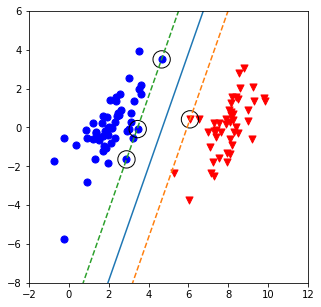

In [267]:
# sns.pointplot(x=0,y=1,data=df,hue=2,linestyles="-")
# sns.pairplot(data=df,vars = [0,1],hue=2)
# g = sns.jointplot(x=0,y=1,data=df,kind="kde")
# g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

%matplotlib inline
plt.figure(figsize = (5,5))

supportVactor = df[list(map(lambda x:x[0]>0,alphas.tolist()))]
plt.scatter(x=df[df["y"] == 1]["x0"],y=df[df["y"] == 1]["x1"],
            s = 50, marker = "v",c="red")
plt.scatter(x=df[df["y"] == -1]["x0"],y=df[df["y"] == -1]["x1"],
            s = 50, c="blue")
plt.scatter(x=supportVactor["x0"],y=supportVactor["x1"],
            s = 300, marker="o",c = "none",edgecolors="black")

plt.plot(HP_x,HP_y)
plt.plot(HP_x,HP_y_H,"--")
plt.plot(HP_x,HP_y_L,"--")
plt.xlim(-2,12)
plt.ylim(-8,6)
plt.show()

### smoP

#### 支持向量求解

#### w求解

#### 可视化

## 核函数

## 实例

### 手写识别